In [1]:
# Analysis of the data RCSB_PDB_Macromolecular_Structure_Dataset
# Analisis de la data RCSB_PDB_Macromolecular_Structure_Dataset

import pandas as pd
import os

# Ruta del archivo a analizar
file_to_analyze = r'C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/RCSB_PDB_Macromolecular_Structure_Dataset.csv'
report_file = r'C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset_full_report.txt'

# Cargar el archivo completo
print("Cargando el archivo completo para análisis...")
try:
    data = pd.read_csv(file_to_analyze, low_memory=False)
    print("Archivo cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Generar reporte
report = []

# Paso 1: Información general del archivo
report.append("=== Información general ===")
report.append(f"Número de filas: {data.shape[0]}")
report.append(f"Número de columnas: {data.shape[1]}")

# Paso 2: Tipos de datos y columnas
report.append("\n=== Tipos de datos y columnas ===")
report.append(data.dtypes.to_string())

# Paso 3: Duplicados
print("Revisando duplicados...")
duplicates_count = data.duplicated().sum()
report.append(f"\n=== Duplicados ===")
report.append(f"Número de duplicados: {duplicates_count}")

# Paso 4: Valores nulos
print("Revisando valores nulos...")
null_summary = data.isnull().sum()
columns_with_nulls = null_summary[null_summary > 0]
report.append("\n=== Valores nulos ===")
if not columns_with_nulls.empty:
    report.append(columns_with_nulls.to_string())
else:
    report.append("No hay valores nulos.")

# Paso 5: Estadísticas descriptivas resumidas
print("Generando estadísticas descriptivas resumidas...")
report.append("\n=== Estadísticas descriptivas resumidas ===")
try:
    report.append(data.describe(include='all', percentiles=[0.25, 0.5, 0.75]).to_string())
except Exception as e:
    report.append(f"Error al generar estadísticas descriptivas: {e}")

# Paso 6: Valores únicos por columna
print("Calculando valores únicos por columna...")
report.append("\n=== Valores únicos por columna ===")
unique_counts = data.nunique()
report.append(unique_counts.to_string())

# Paso 7: Tamaño del archivo en memoria
print("Calculando tamaño del archivo en memoria...")
file_size_mb = data.memory_usage(index=True).sum() / (1024 ** 2)
report.append("\n=== Tamaño del archivo ===")
report.append(f"Tamaño en memoria: {file_size_mb:.2f} MB")

# Paso 8: Verificar caracteres no alfanuméricos en columnas de texto
print("Verificando caracteres no alfanuméricos en columnas de texto...")
text_columns = data.select_dtypes(include=['object']).columns
special_character_report = {}
for col in text_columns:
    special_characters = data[col].dropna().apply(lambda x: any(not char.isalnum() and not char.isspace() for char in str(x))).sum()
    special_character_report[col] = special_characters
report.append("\n=== Caracteres no alfanuméricos en columnas de texto ===")
for col, count in special_character_report.items():
    report.append(f"Columna '{col}': {count} valores con caracteres especiales")

# Paso 9: Columnas con baja variabilidad
print("Detectando columnas con baja variabilidad...")
def detectar_baja_variabilidad(data, threshold=0.01):
    numeric_columns = data.select_dtypes(include=['float64', 'int64'])
    low_variance_columns = numeric_columns.columns[numeric_columns.std() < threshold]
    return list(low_variance_columns)

low_variance_columns = detectar_baja_variabilidad(data, threshold=0.01)
report.append("\n=== Columnas con baja variabilidad ===")
report.append(f"Número de columnas detectadas: {len(low_variance_columns)}")
report.append("\n".join(low_variance_columns))

# Guardar el reporte
print("Generando reporte final...")
try:
    with open(report_file, 'w') as file:
        file.write("\n".join(report))
    print(f"Reporte generado y guardado en {report_file}")
except Exception as e:
    print(f"Error al guardar el reporte: {e}")

Cargando el archivo completo para análisis...
Archivo cargado exitosamente.
Revisando duplicados...
Revisando valores nulos...
Generando estadísticas descriptivas resumidas...
Calculando valores únicos por columna...
Calculando tamaño del archivo en memoria...
Verificando caracteres no alfanuméricos en columnas de texto...
Detectando columnas con baja variabilidad...
Generando reporte final...
Reporte generado y guardado en C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset_full_report.txt


In [2]:
# The columns with low variability do not contribute to the Machine Learning models, I will proceed to eliminate them. 
# Las columnas de baja variabilidad no aportan a los modelos de Machine Learning procedere a eliminarlas 

# Ruta del archivo a analizar
file_to_analyze = r'C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/RCSB_PDB_Macromolecular_Structure_Dataset.csv'
output_file = r'C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/RCSB_PDB_Macromolecular_Structure_Dataset_cleaned.csv'

# Cargar el archivo completo
print("Cargando el archivo completo para análisis...")
try:
    data = pd.read_csv(file_to_analyze, low_memory=False)
    print("Archivo cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Paso 1: Eliminar columnas con baja variabilidad
print("Detectando columnas con baja variabilidad...")
def detectar_baja_variabilidad(data, threshold=0.01):
    numeric_columns = data.select_dtypes(include=['float64', 'int64'])
    low_variance_columns = numeric_columns.columns[numeric_columns.std() < threshold]
    return list(low_variance_columns)

low_variance_columns = detectar_baja_variabilidad(data, threshold=0.01)
print(f"Columnas con baja variabilidad detectadas: {len(low_variance_columns)}")
data_cleaned = data.drop(columns=low_variance_columns, errors='ignore')
print(f"Dimensiones después de eliminar columnas con baja variabilidad: {data_cleaned.shape}")

# Paso 2: Manejar valores nulos
print("Imputando o eliminando valores nulos según el porcentaje...")
missing_percentage = data_cleaned.isnull().mean() * 100

# Imputar la media para columnas con menos del 35% de valores nulos
columns_to_impute = missing_percentage[missing_percentage <= 35].index
for col in columns_to_impute:
    try:
        if data_cleaned[col].dtype in ['float64', 'int64']:
            data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')
            data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mean())
            print(f"Columna '{col}' imputada con la media.")
    except Exception as e:
        print(f"Error al imputar la columna '{col}': {e}")

# Eliminar columnas con más del 35% de valores nulos (excepto excepciones)
columns_to_drop = missing_percentage[missing_percentage > 35].index
columns_to_drop = columns_to_drop.drop('Disulfide Bond Count per Deposited Model', errors='ignore')
data_cleaned = data_cleaned.drop(columns=columns_to_drop, errors='ignore')
print(f"Columnas eliminadas por alto porcentaje de nulos: {len(columns_to_drop)}")

# Manejar específicamente 'Disulfide Bond Count per Deposited Model'
if 'Disulfide Bond Count per Deposited Model' in data_cleaned.columns:
    data_cleaned['Disulfide Bond Count per Deposited Model'] = data_cleaned['Disulfide Bond Count per Deposited Model'].fillna(0)
    print("Columna 'Disulfide Bond Count per Deposited Model' imputada con ceros para valores nulos.")

# Paso 3: Validar caracteres especiales en columnas de texto
print("Verificando caracteres no alfanuméricos en columnas de texto...")
text_columns = data_cleaned.select_dtypes(include=['object']).columns
special_character_report = {}
for col in text_columns:
    special_characters = data_cleaned[col].dropna().apply(lambda x: any(not char.isalnum() and not char.isspace() for char in str(x))).sum()
    special_character_report[col] = special_characters
print("Reporte de caracteres especiales en columnas de texto:")
for col, count in special_character_report.items():
    print(f"Columna '{col}': {count} valores con caracteres especiales")

# Guardar el archivo limpio
print("Guardando el archivo limpio...")
try:
    data_cleaned.to_csv(output_file, index=False)
    print(f"Archivo limpio guardado en: {output_file}")
except Exception as e:
    print(f"Error al guardar el archivo limpio: {e}")

Cargando el archivo completo para análisis...
Archivo cargado exitosamente.
Detectando columnas con baja variabilidad...
Columnas con baja variabilidad detectadas: 1
Dimensiones después de eliminar columnas con baja variabilidad: (11832, 45)
Imputando o eliminando valores nulos según el porcentaje...
Columna 'Matthews Coefficient' imputada con la media.
Columna 'Percent Solvent Content' imputada con la media.
Columna 'pH' imputada con la media.
Columna 'Temp (K)' imputada con la media.
Columna 'Number of Non-Hydrogen Atoms per Deposited Model' imputada con la media.
Columna 'Total Number of Polymer Instances (Chains)' imputada con la media.
Columna 'Total Number of Polymer Residues per Deposited Model' imputada con la media.
Columna 'Number of Water Molecules per Deposited Model' imputada con la media.
Columna 'Molecular Weight per Deposited Model' imputada con la media.
Columna 'Number of Distinct Protein Entities' imputada con la media.
Columna 'Average B Factor' imputada con la medi

In [3]:
# I will generate a second report to see the data after cleaning.
# Voy a generar un segundo reporte para ver los datos luego de la limpieza


# Ruta del archivo a analizar
file_to_analyze = r'C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/RCSB_PDB_Macromolecular_Structure_Dataset_cleaned.csv'
report_file = r'C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset_cleaned_full_report_1.txt'

# Cargar el archivo completo
print("Cargando el archivo completo para análisis...")
try:
    data = pd.read_csv(file_to_analyze, low_memory=False)
    print("Archivo cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Generar reporte
report = []

# Paso 1: Información general del archivo
report.append("=== Información general ===")
report.append(f"Número de filas: {data.shape[0]}")
report.append(f"Número de columnas: {data.shape[1]}")

# Paso 2: Tipos de datos y columnas
report.append("\n=== Tipos de datos y columnas ===")
report.append(data.dtypes.to_string())

# Paso 3: Duplicados
print("Revisando duplicados...")
duplicates_count = data.duplicated().sum()
report.append(f"\n=== Duplicados ===")
report.append(f"Número de duplicados: {duplicates_count}")

# Paso 4: Valores nulos
print("Revisando valores nulos...")
null_summary = data.isnull().sum()
columns_with_nulls = null_summary[null_summary > 0]
report.append("\n=== Valores nulos ===")
if not columns_with_nulls.empty:
    report.append(columns_with_nulls.to_string())
else:
    report.append("No hay valores nulos.")

# Paso 5: Estadísticas descriptivas resumidas
print("Generando estadísticas descriptivas resumidas...")
report.append("\n=== Estadísticas descriptivas resumidas ===")
try:
    report.append(data.describe(include='all', percentiles=[0.25, 0.5, 0.75]).to_string())
except Exception as e:
    report.append(f"Error al generar estadísticas descriptivas: {e}")

# Paso 6: Valores únicos por columna
print("Calculando valores únicos por columna...")
report.append("\n=== Valores únicos por columna ===")
unique_counts = data.nunique()
report.append(unique_counts.to_string())

# Paso 7: Tamaño del archivo en memoria
print("Calculando tamaño del archivo en memoria...")
file_size_mb = data.memory_usage(index=True).sum() / (1024 ** 2)
report.append("\n=== Tamaño del archivo ===")
report.append(f"Tamaño en memoria: {file_size_mb:.2f} MB")

# Paso 8: Verificar caracteres no alfanuméricos en columnas de texto
print("Verificando caracteres no alfanuméricos en columnas de texto...")
text_columns = data.select_dtypes(include=['object']).columns
special_character_report = {}
for col in text_columns:
    special_characters = data[col].dropna().apply(lambda x: any(not char.isalnum() and not char.isspace() for char in str(x))).sum()
    special_character_report[col] = special_characters
report.append("\n=== Caracteres no alfanuméricos en columnas de texto ===")
for col, count in special_character_report.items():
    report.append(f"Columna '{col}': {count} valores con caracteres especiales")

# Paso 9: Columnas con baja variabilidad
print("Detectando columnas con baja variabilidad...")
def detectar_baja_variabilidad(data, threshold=0.01):
    numeric_columns = data.select_dtypes(include=['float64', 'int64'])
    low_variance_columns = numeric_columns.columns[numeric_columns.std() < threshold]
    return list(low_variance_columns)

low_variance_columns = detectar_baja_variabilidad(data, threshold=0.01)
report.append("\n=== Columnas con baja variabilidad ===")
report.append(f"Número de columnas detectadas: {len(low_variance_columns)}")
report.append("\n".join(low_variance_columns))

# Guardar el reporte
print("Generando reporte final...")
try:
    with open(report_file, 'w') as file:
        file.write("\n".join(report))
    print(f"Reporte generado y guardado en {report_file}")
except Exception as e:
    print(f"Error al guardar el reporte: {e}")

Cargando el archivo completo para análisis...
Archivo cargado exitosamente.
Revisando duplicados...
Revisando valores nulos...
Generando estadísticas descriptivas resumidas...
Calculando valores únicos por columna...
Calculando tamaño del archivo en memoria...
Verificando caracteres no alfanuméricos en columnas de texto...
Detectando columnas con baja variabilidad...
Generando reporte final...
Reporte generado y guardado en C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset_cleaned_full_report_1.txt


In [4]:
# There are still null values in some columns so I will focus on those specific columns.
# Aun hay valores nulos en algunas columnas por lo que hare un enfoque a esas columnas en especifico

# Ruta del archivo limpio
file_to_analyze = r'C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/RCSB_PDB_Macromolecular_Structure_Dataset_cleaned.csv'
output_file = r'C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/RCSB_PDB_Macromolecular_Structure_Dataset_refined.csv'
report_file = r'C:/Polimeromics/data/RCSB_PDB_specific_columns_report.txt'

# Columnas específicas a tratar
columns_to_clean = [
    'Crystallization Method', 'Crystal Growth Procedure', 'EC Number', 
    'EC Provenance Source', 'Ligand ID', 'Ligand Formula', 'Ligand Name', 'InChI'
]

# Cargar los datos
print("Cargando el archivo para análisis de columnas específicas...")
try:
    data = pd.read_csv(file_to_analyze, low_memory=False)
    print("Archivo cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Inicializar reporte
report = []

# Verificar y limpiar las columnas
for col in columns_to_clean:
    if col in data.columns:
        missing_count = data[col].isnull().sum()
        missing_percentage = (missing_count / len(data)) * 100
        report.append(f"Columna: {col}")
        report.append(f"Valores nulos: {missing_count} ({missing_percentage:.2f}%)")

        # Limpieza según el tipo de datos
        if data[col].dtype in ['float64', 'int64']:
            data[col] = data[col].fillna(data[col].mean())
            report.append(f"- Valores nulos imputados con la media.")
        else:
            data[col] = data[col].fillna('Desconocido')
            report.append(f"- Valores nulos imputados con 'Desconocido'.")
    else:
        report.append(f"Columna: {col} no está presente en el dataset.")

# Guardar el reporte
print("Generando reporte...")
try:
    with open(report_file, 'w') as file:
        file.write("\n".join(report))
    print(f"Reporte generado y guardado en: {report_file}")
except Exception as e:
    print(f"Error al guardar el reporte: {e}")

# Guardar el archivo limpio
print("Guardando el archivo limpio con columnas específicas tratadas...")
try:
    data.to_csv(output_file, index=False)
    print(f"Archivo limpio guardado en: {output_file}")
except Exception as e:
    print(f"Error al guardar el archivo limpio: {e}")


Cargando el archivo para análisis de columnas específicas...
Archivo cargado exitosamente.
Generando reporte...
Reporte generado y guardado en: C:/Polimeromics/data/RCSB_PDB_specific_columns_report.txt
Guardando el archivo limpio con columnas específicas tratadas...
Archivo limpio guardado en: C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/RCSB_PDB_Macromolecular_Structure_Dataset_refined.csv


Cargando el archivo para visualizaciones...
Archivo cargado exitosamente.
Generando gráfica para la distribución de 'Crystallization Method' (Top 10)...


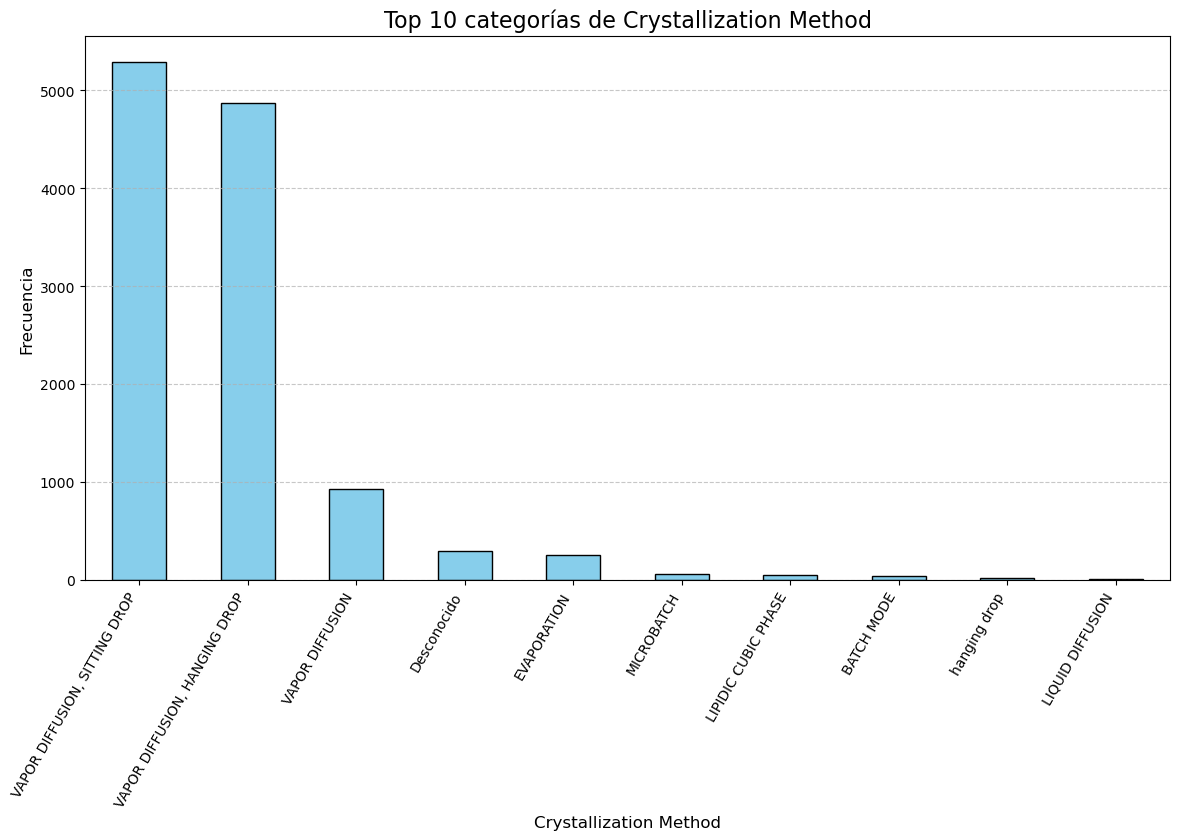

Generando gráfica para la distribución de 'Crystal Growth Procedure' (Top 10)...


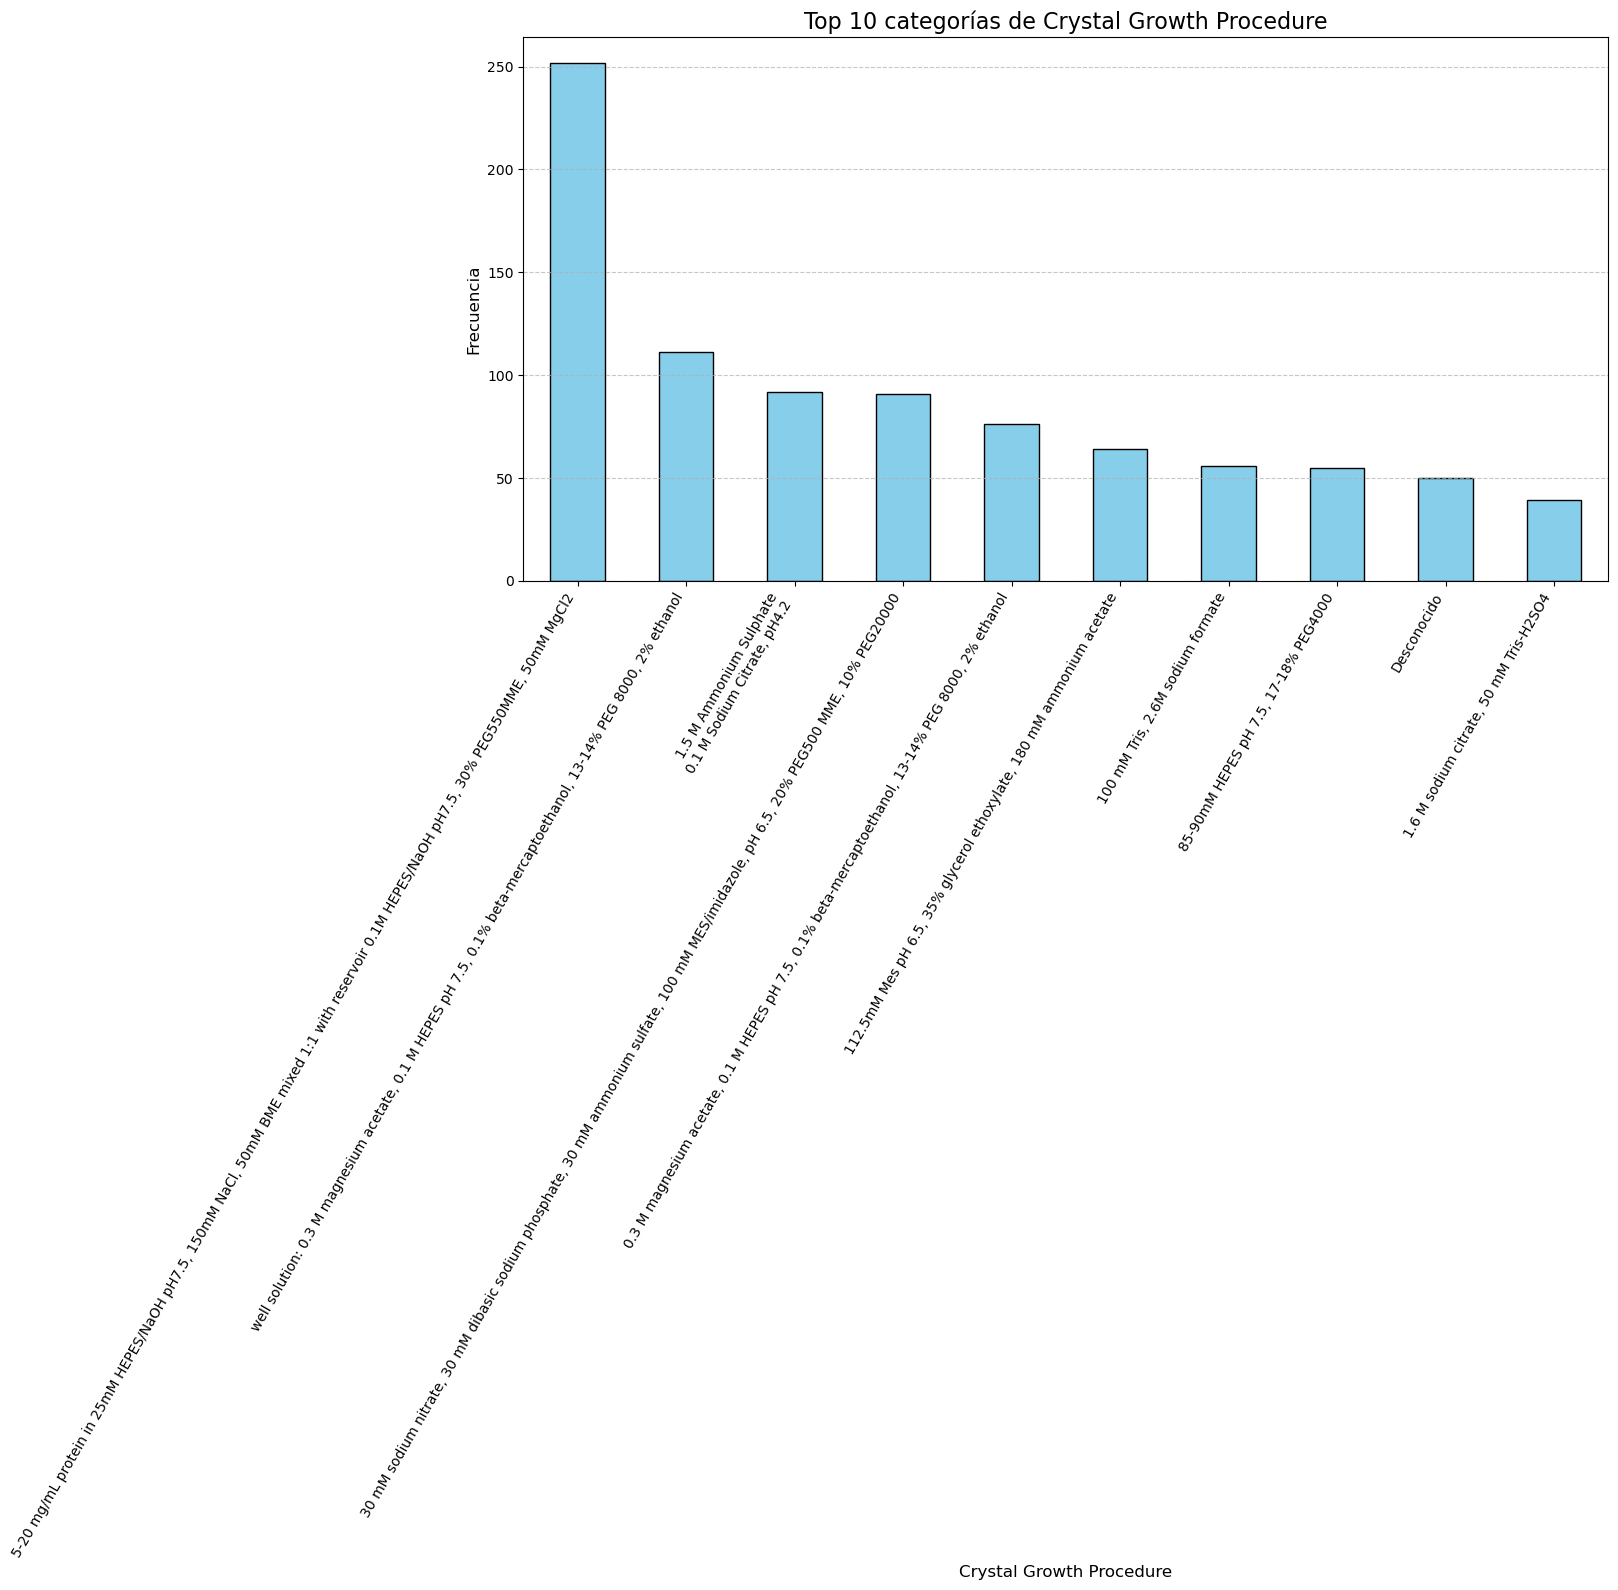

Generando gráfica para la distribución de 'EC Provenance Source' (Top 10)...


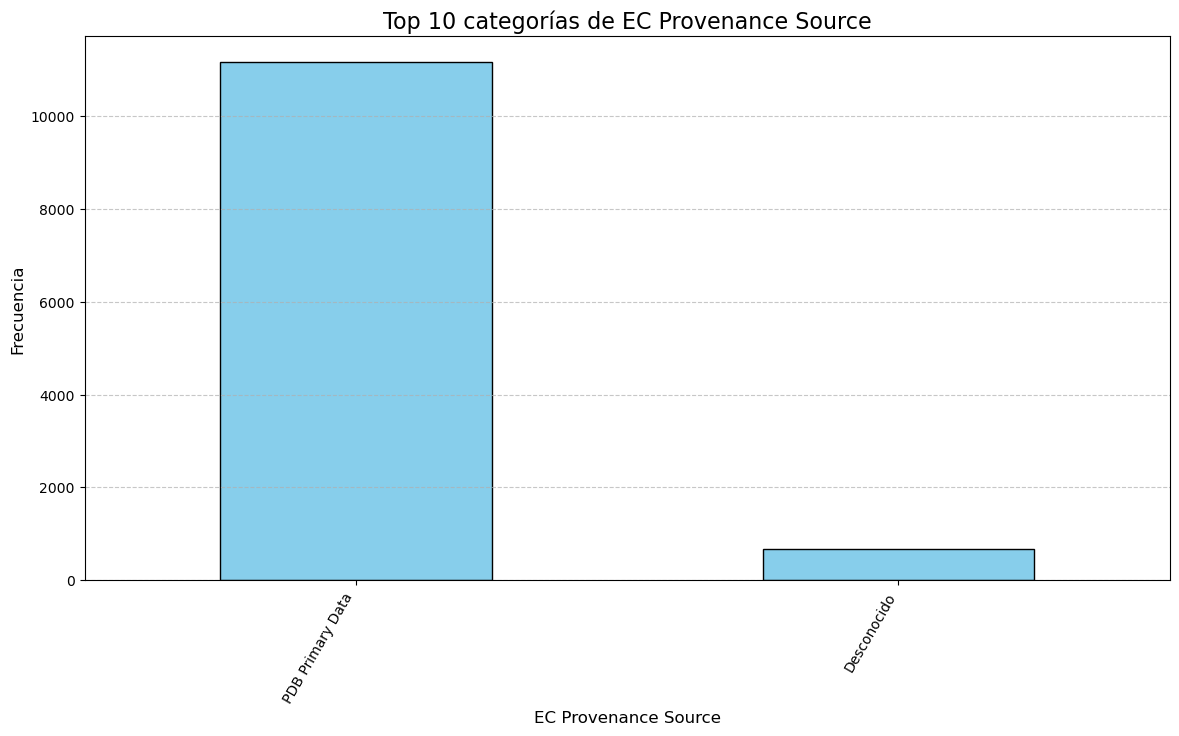

Generando gráfica para la distribución de 'Ligand Name' (Top 10)...


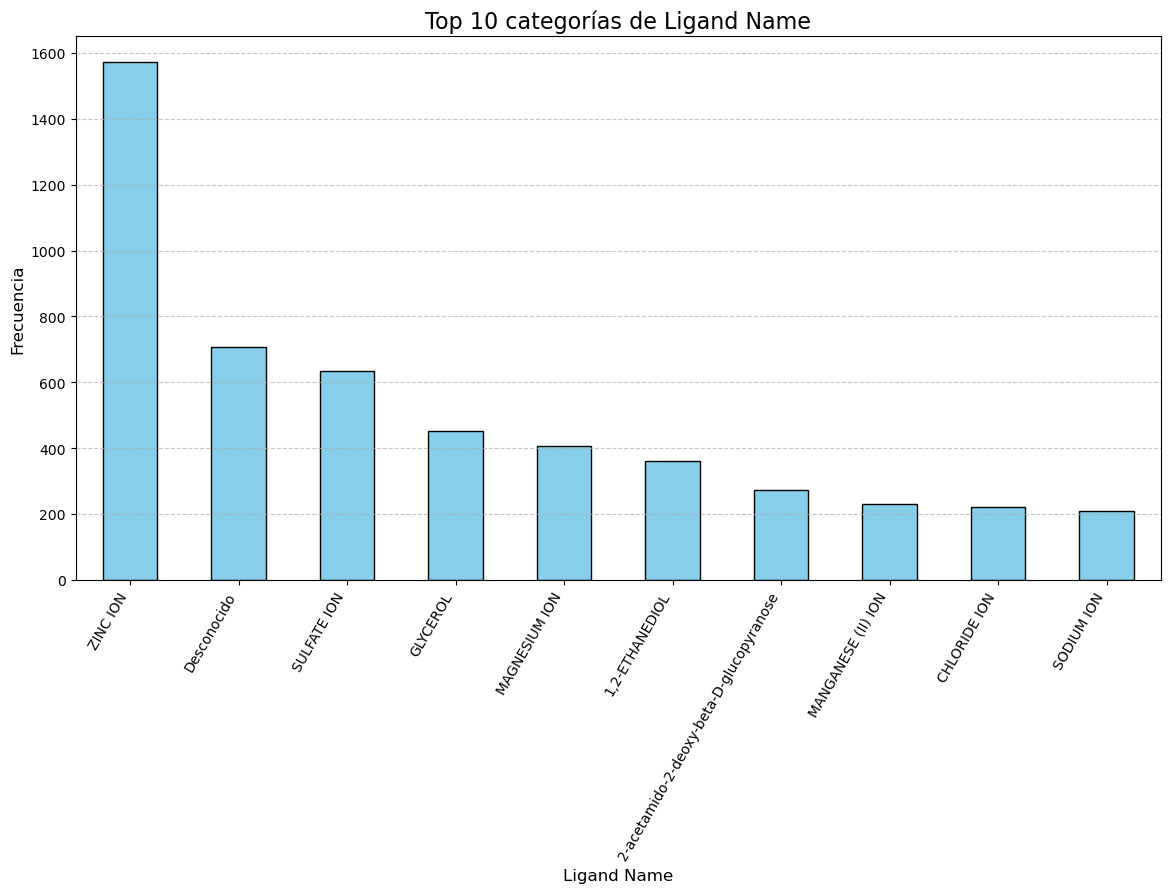

Generando histograma para la columna 'pH'...


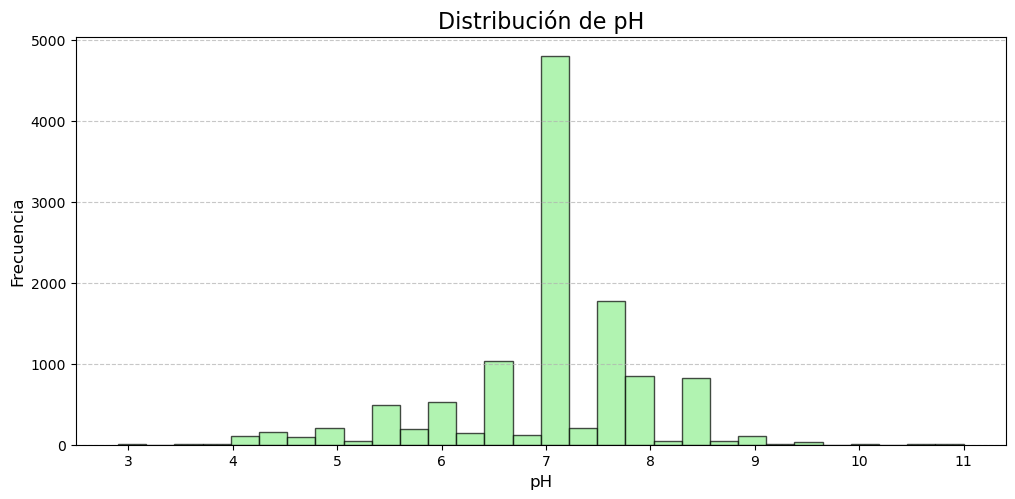

Generando histograma para la columna 'Average B Factor'...


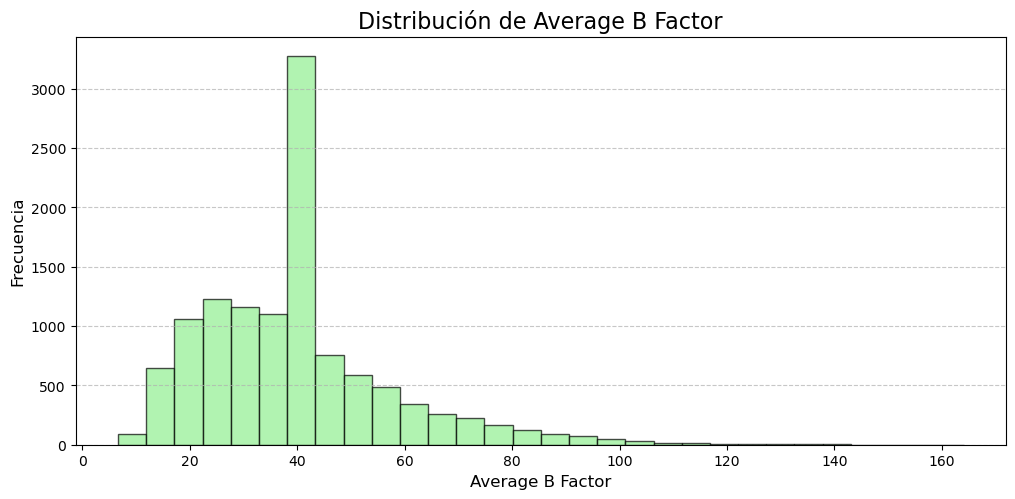

Generando mapa de correlación entre columnas numéricas...


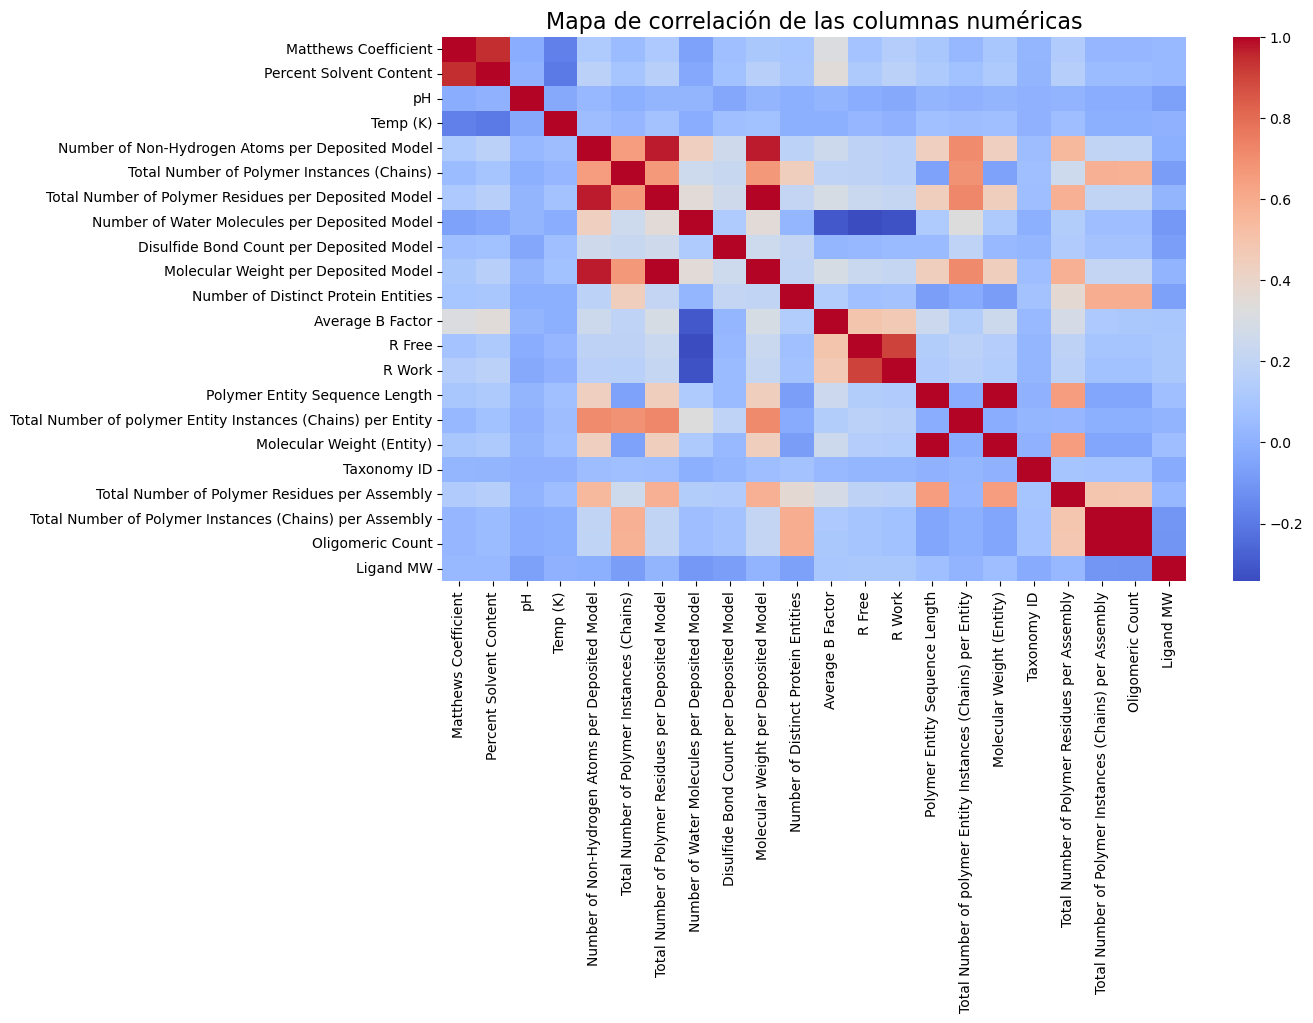

In [7]:
# Reports indicate cleanliness in the file
# We visualize the distribution of the values in categorical columns.

# Los reportes indican limpieza en el archivo
# Vizualizalizamos la distribucion de los valores en columnas categoricas


import matplotlib.pyplot as plt
import seaborn as sns

# Ruta del archivo limpio
file_to_analyze = r'C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/RCSB_PDB_Macromolecular_Structure_Dataset_refined.csv'

# Cargar los datos
print("Cargando el archivo para visualizaciones...")
try:
    data = pd.read_csv(file_to_analyze, low_memory=False)
    print("Archivo cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Visualización 1: Distribución de valores en columnas categóricas (Top 10 categorías)
categorical_columns = ['Crystallization Method', 'Crystal Growth Procedure', 
                       'EC Provenance Source', 'Ligand Name']
for col in categorical_columns:
    if col in data.columns:
        print(f"Generando gráfica para la distribución de '{col}' (Top 10)...")
        plt.figure(figsize=(14, 8))
        data[col].value_counts().head(10).plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Top 10 categorías de {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.xticks(rotation=60, fontsize=10, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.subplots_adjust(bottom=0.2)  # Ajusta márgenes inferiores
        plt.savefig('C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/valores_columnas_categoricas_RCSB_PDB.png', dpi=300, bbox_inches='tight')
        plt.show()

# Visualización 2: Distribución de valores en columnas numéricas
numerical_columns = ['pH', 'Average B Factor']
for col in numerical_columns:
    if col in data.columns:
        print(f"Generando histograma para la columna '{col}'...")
        plt.figure(figsize=(12, 6))
        data[col].dropna().plot(kind='hist', bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
        plt.title(f'Distribución de {col}', fontsize=16)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frecuencia', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.subplots_adjust(bottom=0.2)  # Ajusta márgenes inferiores
        plt.savefig('C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/valores_columnas_numericas_RCSB_PDB.png', dpi=300, bbox_inches='tight')
        plt.show()

# Visualización 3: Mapa de correlación
print("Generando mapa de correlación entre columnas numéricas...")
numeric_columns = data.select_dtypes(include=['float64', 'int64'])
if not numeric_columns.empty:
    correlation_matrix = numeric_columns.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f', cbar=True)
    plt.title('Mapa de correlación de las columnas numéricas', fontsize=16)
    plt.subplots_adjust(bottom=0.2)  # Ajusta márgenes inferiores
    plt.savefig('C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/mapa_correlacion_RCSB_PDB.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No se encontraron columnas numéricas para generar un mapa de correlación.")


In [8]:
# It is time to prepare the data to be integrated into a single SQL database. 
# I will proceed to the final check of each file for redundant columns and a unique identifier to relate to. 

# Es el momento de preparar los datos para integrar en una sola base de datos en SQL 
# Procedere a la verificacion final de cada archivo en busqueda de columnas redundantes y un identificador unico para relacionar 


import pandas as pd

# Ruta del archivo limpio (modificar según el archivo a procesar)
file_to_analyze = r'C:/Polimeromics/data/RCSB_PDB_Macromolecular_Structure_Dataset/RCSB_PDB_Macromolecular_Structure_Dataset_refined.csv'
output_file = r'C:/Polimeromics/data/RCSB_PDB/RCSB_PDB_Macromolecular_Structure_Dataset_cleaned_no_redundancy.csv'

# Cargar el archivo limpio
print("Cargando el archivo limpio para verificación...")
try:
    data = pd.read_csv(file_to_analyze, low_memory=False)
    print("Archivo cargado exitosamente.")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    exit()

# Paso 1: Verificar columnas redundantes
print("Verificando columnas redundantes...")
redundant_columns = []
for col1 in data.columns:
    for col2 in data.columns:
        if col1 != col2 and data[col1].equals(data[col2]):
            redundant_columns.append((col1, col2))
            print(f"Las columnas '{col1}' y '{col2}' son redundantes.")

if not redundant_columns:
    print("No se encontraron columnas redundantes.")

# Paso 2: Verificar identificador único
print("Buscando un identificador único...")
unique_identifier_found = False
for column in data.columns:
    if data[column].is_unique:
        unique_identifier_found = True
        print(f"La columna '{column}' es un identificador único.")
        break

if not unique_identifier_found:
    print("No se encontró un identificador único en las columnas existentes.")

# Paso 3: Confirmar que las columnas numéricas están normalizadas
print("Verificando normalización de columnas numéricas...")
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
if not numeric_columns.empty:
    for col in numeric_columns:
        min_val, max_val = data[col].min(), data[col].max()
        print(f"Columna '{col}': Min={min_val}, Max={max_val}")
        if min_val < 0 or max_val > 1:
            print(f"Advertencia: La columna '{col}' no parece estar normalizada.")
else:
    print("No se encontraron columnas numéricas para verificar.")

# Guardar el archivo limpio si es necesario
print("Guardando el archivo limpio sin redundancias (si aplica)...")
try:
    data.to_csv(output_file, index=False)
    print(f"Archivo limpio guardado en: {output_file}")
except Exception as e:
    print(f"Error al guardar el archivo: {e}")


Cargando el archivo limpio para verificación...
Archivo cargado exitosamente.
Verificando columnas redundantes...
No se encontraron columnas redundantes.
Buscando un identificador único...
La columna 'Entry ID' es un identificador único.
Verificando normalización de columnas numéricas...
Columna 'Matthews Coefficient': Min=0.41, Max=7.24
Advertencia: La columna 'Matthews Coefficient' no parece estar normalizada.
Columna 'Percent Solvent Content': Min=0.41, Max=83.0
Advertencia: La columna 'Percent Solvent Content' no parece estar normalizada.
Columna 'pH': Min=2.9, Max=11.0
Advertencia: La columna 'pH' no parece estar normalizada.
Columna 'Temp (K)': Min=273.0, Max=316.0
Advertencia: La columna 'Temp (K)' no parece estar normalizada.
Columna 'Number of Non-Hydrogen Atoms per Deposited Model': Min=279.0, Max=50949.0
Advertencia: La columna 'Number of Non-Hydrogen Atoms per Deposited Model' no parece estar normalizada.
Columna 'Total Number of Polymer Instances (Chains)': Min=1.0, Max=42

In [1]:
# Use Phyton to suggest the SQL table and automatically generate a table name based on the file name.
# Set the data type of each column (INT, FLOAT, TEXT, TIMESTAMP) based on the contents of the file.

# Utilizare Phyton para que sugiera la tabla SQL y genere automáticamente un nombre de tabla basado en el nombre del archivo
# Ajusta el tipo de dato de cada columna (INT, FLOAT, TEXT, TIMESTAMP) según el contenido del archivo.


import pandas as pd

def analyze_csv_structure(file_path):
    """
    Analiza la estructura de un archivo CSV para sugerir la creación de una tabla SQL con nombres de columnas normalizados y tipos de datos mejor detectados.

    Args:
        file_path (str): Ruta del archivo CSV.

    Returns:
        str: Instrucción SQL sugerida para crear una tabla.
    """
    try:
        # Leer el archivo CSV
        df = pd.read_csv(file_path, encoding='utf-8')

        # Normalizar el nombre de la tabla
        table_name = file_path.split('/')[-1].split('.')[0].replace('-', '_').replace(' ', '_').lower()
        create_table = f"CREATE TABLE {table_name} (\n"

        # Iterar por las columnas para determinar tipos de datos
        for col in df.columns:
            # Normalizar el nombre de la columna
            col_normalized = col.replace('.', '_').replace(' ', '_').lower()

            # Detectar el tipo de dato
            col_type = "TEXT"  # Tipo de datos predeterminado
            if pd.api.types.is_integer_dtype(df[col]):
                col_type = "INT"
            elif pd.api.types.is_float_dtype(df[col]):
                col_type = "FLOAT"
            elif pd.api.types.is_datetime64_any_dtype(df[col]):
                col_type = "TIMESTAMP"

            # Añadir definición de columna
            create_table += f"    {col_normalized} {col_type},\n"

        # Eliminar la última coma y cerrar la declaración
        create_table = create_table.rstrip(',\n') + '\n);'

        return create_table

    except Exception as e:
        return f"Error al analizar el archivo CSV: {e}"

# Ejemplo de uso
file_path = 'C:/Polimeromics/data/RCSB_PDB/RCSB_PDB_Macromolecular_Structure_Dataset_cleaned_no_redundancy_uft8.csv'
print(analyze_csv_structure(file_path))


CREATE TABLE rcsb_pdb_macromolecular_structure_dataset_cleaned_no_redundancy_uft8 (
    entry_id TEXT,
    experimental_method TEXT,
    matthews_coefficient FLOAT,
    percent_solvent_content FLOAT,
    crystallization_method TEXT,
    ph FLOAT,
    crystal_growth_procedure TEXT,
    temp_(k) FLOAT,
    deposition_date TEXT,
    release_date TEXT,
    number_of_non-hydrogen_atoms_per_deposited_model FLOAT,
    total_number_of_polymer_instances_(chains) FLOAT,
    total_number_of_polymer_residues_per_deposited_model FLOAT,
    number_of_water_molecules_per_deposited_model FLOAT,
    disulfide_bond_count_per_deposited_model FLOAT,
    molecular_weight_per_deposited_model FLOAT,
    number_of_distinct_protein_entities FLOAT,
    refinement_resolution_(ã) TEXT,
    structure_determination_methodology TEXT,
    average_b_factor FLOAT,
    r_free FLOAT,
    r_work FLOAT,
    structure_title TEXT,
    sequence TEXT,
    entity_polymer_type TEXT,
    polymer_entity_sequence_length FLOAT,
   

In [4]:
# I'll adjust the headers to match the table in SQL
# Ajustare los encabezados para que coincidan con la tabla en SQL

import pandas as pd

def clean_and_adjust_headers(input_file, output_file):
    """
    Limpia y ajusta los encabezados de un archivo CSV para que coincidan con los definidos en PostgreSQL.

    Args:
        input_file (str): Ruta del archivo CSV original.
        output_file (str): Ruta del archivo CSV procesado.
    """
    try:
        # Leer el archivo CSV
        df = pd.read_csv(input_file, encoding='utf-8')

        # Mapeo de encabezados ajustados
        header_mapping = {
            'number_of_non-hydrogen_atoms_per_deposited_model': 'number_of_non_hydrogen_atoms',
            'total_number_of_polymer_instances_chains': 'total_polymer_instances',
            'total_number_of_polymer_residues_per_deposited_model': 'total_polymer_residues',
            'number_of_water_molecules_per_deposited_model': 'number_of_water_molecules',
            'disulfide_bond_count_per_deposited_model': 'disulfide_bond_count',
            'molecular_weight_per_deposited_model': 'molecular_weight',
            'refinement_resolution_ã\x85': 'refinement_resolution',
            'total_number_of_polymer_entity_instances_chains_per_entity': 'total_polymer_entity_instances',
            'total_number_of_polymer_instances_chains_per_assembly': 'total_polymer_instances_assembly',
            'total_number_of_polymer_residues_per_assembly': 'total_polymer_residues_assembly'
        }

        # Renombrar las columnas
        df.rename(columns=header_mapping, inplace=True)

        # Guardar el archivo con los encabezados ajustados
        df.to_csv(output_file, index=False, encoding='utf-8')
        print(f"Archivo procesado y guardado en: {output_file}")
    except Exception as e:
        print(f"Error al procesar el archivo: {e}")

# Ejemplo de uso
input_file = 'C:/Polimeromics/data/RCSB_PDB/RCSB_PDB_cleaned_headers_uft8,.csv'
output_file = 'C:/Polimeromics/data/RCSB_PDB/RCSB_PDB_adjusted_headers_uft8.csv'
clean_and_adjust_headers(input_file, output_file)


Archivo procesado y guardado en: C:/Polimeromics/data/RCSB_PDB/RCSB_PDB_adjusted_headers_uft8.csv


In [5]:
# I have problems with data loading I will set up a new plan that includes column name mapping
# Rename, validate numeric columns, delete invalid rows with dropna

# Tengo problemas con la carga de datos establecere un nuevo plan que incluye el mapeo de nombres de columnas
# Renombrar, validar columnas numericas,eliminar filas no validas con dropna

import pandas as pd

def clean_and_validate_csv(input_file, output_file):
    """
    Limpia y valida un archivo CSV para asegurarse de que los datos sean compatibles con PostgreSQL.

    Args:
        input_file (str): Ruta del archivo CSV original.
        output_file (str): Ruta del archivo CSV limpio y validado.
    """
    try:
        # Leer el archivo CSV
        print(f"Leyendo el archivo: {input_file}")
        df = pd.read_csv(input_file, encoding='utf-8')

        # Mapeo de nombres de columnas, ajustar según la tabla en PostgreSQL
        header_mapping = {
            'number_of_non-hydrogen_atoms_per_deposited_model': 'number_of_non_hydrogen_atoms',
            'total_number_of_polymer_instances_chains': 'total_polymer_instances',
            'total_number_of_polymer_residues_per_deposited_model': 'total_polymer_residues',
            'number_of_water_molecules_per_deposited_model': 'number_of_water_molecules',
            'disulfide_bond_count_per_deposited_model': 'disulfide_bond_count',
            'molecular_weight_per_deposited_model': 'molecular_weight',
            'refinement_resolution_ã\x85': 'refinement_resolution',
            'total_number_of_polymer_entity_instances_chains_per_entity': 'total_polymer_entity_instances',
            'total_number_of_polymer_instances_chains_per_assembly': 'total_polymer_instances_assembly',
            'total_number_of_polymer_residues_per_assembly': 'total_polymer_residues_assembly'
        }

        # Renombrar columnas
        df.rename(columns=header_mapping, inplace=True)

        # Validar columnas numéricas
        numeric_columns = [
            'matthews_coefficient', 'percent_solvent_content', 'ph', 'temp_k',
            'number_of_non_hydrogen_atoms', 'total_polymer_instances', 'total_polymer_residues',
            'number_of_water_molecules', 'disulfide_bond_count', 'molecular_weight',
            'number_of_distinct_protein_entities', 'refinement_resolution', 'average_b_factor',
            'r_free', 'r_work', 'polymer_entity_sequence_length', 'molecular_weight_entity',
            'taxonomy_id', 'total_polymer_residues_assembly', 'total_polymer_instances_assembly',
            'oligomeric_count', 'ligand_mw'
        ]
        
        for col in numeric_columns:
            if col in df.columns:
                print(f"Validando columna: {col}")
                # Convertir a numérico y reemplazar errores con NaN
                df[col] = pd.to_numeric(df[col], errors='coerce')

        # Eliminar filas con valores no válidos en las columnas críticas
        print("Eliminando filas con valores no válidos...")
        df.dropna(subset=['matthews_coefficient'], inplace=True)

        # Guardar el archivo limpio
        df.to_csv(output_file, index=False, encoding='utf-8')
        print(f"Archivo procesado y guardado en: {output_file}")
    except Exception as e:
        print(f"Error al procesar el archivo: {e}")

# Ruta de entrada y salida
input_file = 'C:/Polimeromics/data/RCSB_PDB/RCSB_PDB_adjusted_headers_uft8.csv'
output_file = 'C:/Polimeromics/data/RCSB_PDB/RCSB_PDB_cleaned_and_validated.csv'
clean_and_validate_csv(input_file, output_file)


Leyendo el archivo: C:/Polimeromics/data/RCSB_PDB/RCSB_PDB_adjusted_headers_uft8.csv
Validando columna: matthews_coefficient
Validando columna: percent_solvent_content
Validando columna: ph
Validando columna: temp_k
Validando columna: number_of_non_hydrogen_atoms
Validando columna: total_polymer_instances
Validando columna: total_polymer_residues
Validando columna: number_of_water_molecules
Validando columna: disulfide_bond_count
Validando columna: molecular_weight
Validando columna: number_of_distinct_protein_entities
Validando columna: refinement_resolution
Validando columna: average_b_factor
Validando columna: r_free
Validando columna: r_work
Validando columna: polymer_entity_sequence_length
Validando columna: molecular_weight_entity
Validando columna: taxonomy_id
Validando columna: total_polymer_residues_assembly
Validando columna: total_polymer_instances_assembly
Validando columna: oligomeric_count
Validando columna: ligand_mw
Eliminando filas con valores no válidos...
Archivo pro

In [6]:
# Use Phyton to suggest the SQL table and automatically generate a table name based on the file name.
# Set the data type of each column (INT, FLOAT, TEXT, TIMESTAMP) based on the contents of the file.

# Utilizare Phyton para que sugiera la tabla SQL y genere automáticamente un nombre de tabla basado en el nombre del archivo
# Ajusta el tipo de dato de cada columna (INT, FLOAT, TEXT, TIMESTAMP) según el contenido del archivo.


import pandas as pd

def analyze_csv_structure(file_path):
    """
    Analiza la estructura de un archivo CSV para sugerir la creación de una tabla SQL con nombres de columnas normalizados y tipos de datos mejor detectados.

    Args:
        file_path (str): Ruta del archivo CSV.

    Returns:
        str: Instrucción SQL sugerida para crear una tabla.
    """
    try:
        # Leer el archivo CSV
        df = pd.read_csv(file_path, encoding='utf-8')

        # Normalizar el nombre de la tabla
        table_name = file_path.split('/')[-1].split('.')[0].replace('-', '_').replace(' ', '_').lower()
        create_table = f"CREATE TABLE {table_name} (\n"

        # Iterar por las columnas para determinar tipos de datos
        for col in df.columns:
            # Normalizar el nombre de la columna
            col_normalized = col.replace('.', '_').replace(' ', '_').lower()

            # Detectar el tipo de dato
            col_type = "TEXT"  # Tipo de datos predeterminado
            if pd.api.types.is_integer_dtype(df[col]):
                col_type = "INT"
            elif pd.api.types.is_float_dtype(df[col]):
                col_type = "FLOAT"
            elif pd.api.types.is_datetime64_any_dtype(df[col]):
                col_type = "TIMESTAMP"

            # Añadir definición de columna
            create_table += f"    {col_normalized} {col_type},\n"

        # Eliminar la última coma y cerrar la declaración
        create_table = create_table.rstrip(',\n') + '\n);'

        return create_table

    except Exception as e:
        return f"Error al analizar el archivo CSV: {e}"

# Ejemplo de uso
file_path = 'C:/Polimeromics/data/RCSB_PDB/RCSB_PDB_cleaned_and_validated.csv'
print(analyze_csv_structure(file_path))


CREATE TABLE rcsb_pdb_cleaned_and_validated (
    entry_id TEXT,
    experimental_method TEXT,
    matthews_coefficient FLOAT,
    percent_solvent_content FLOAT,
    crystallization_method TEXT,
    ph FLOAT,
    crystal_growth_procedure TEXT,
    temp_k FLOAT,
    deposition_date TEXT,
    release_date TEXT,
    number_of_non_hydrogen_atoms FLOAT,
    total_polymer_instances FLOAT,
    total_polymer_residues FLOAT,
    number_of_water_molecules FLOAT,
    disulfide_bond_count FLOAT,
    molecular_weight FLOAT,
    number_of_distinct_protein_entities FLOAT,
    refinement_resolution FLOAT,
    structure_determination_methodology TEXT,
    average_b_factor FLOAT,
    r_free FLOAT,
    r_work FLOAT,
    structure_title TEXT,
    sequence TEXT,
    entity_polymer_type TEXT,
    polymer_entity_sequence_length FLOAT,
    entity_macromolecule_type TEXT,
    total_polymer_entity_instances FLOAT,
    molecular_weight_entity FLOAT,
    macromolecule_name TEXT,
    ec_number TEXT,
    ec_provena